# Midsemester Project (SEE ANALYTICAL WORK attached)
### Emil Balian (ebalian)

In [13]:
# Import Libraries / Packages

import pylab as pyl
import scipy as sci
import numpy as np
from scipy.optimize import fsolve

In [14]:
# Define Constants and variables

G = 6.67430e-11
M_sun = 1.989e30 # in kg
M_earth = 5.972e24 # in kg
M_tot = M_earth + M_sun # in kg

l = 1 # in AU
r_sun = M_earth / M_tot # in AU
r_earth = M_sun / M_tot # in AU


In [15]:
# Define all of our algorithms

def newtonraphson(f, f1, x):
    # Set limits
    accuracy = 1E-9
    Nmax = 1000
    
    # Iterate
    i = 0
    delta = 1
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Guess
        u = x
        x = u - f(u)/f1(u)
        delta = (x-u)/x
        
    return x, i, delta

def secant(f, x):
    # Set limits
    accuracy = 1E-9
    Nmax = 1000
    # Iterate
    i = 0
    delta = 1
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Finite-difference
        if i == 1:
            x1 = 0.95*x
            x2 = 1.05*x
            f1 = (f(x2) - f(x1))/(x2 - x1)
        else:
            f1 = (f(x) - f(u)) / (x-u)
        
        # Guess
        u = x
        x = u - f(u)/f1
        delta = (x-u)/x
        
        
    return x, i, delta

# Bisectional method
def bisection(f, x1, x2):
    # Set limits
    accuracy = 1E-9
    Nmax     = 1000
    
    # Init and check
    f1 = f(x1)
    f2 = f(x2)
    if f1*f2 > 0:
        return
    
    # Iterate
    i     = 0
    delta = 1.0
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Midpoint
        xc    = (x1 + x2)/2
        fc    = f(xc)
        delta = (xc - x1)/xc
        
        # Check
        if f1*fc > 0:
            x1 = xc
            f1 = fc
        else:
            x2 = xc
            f2 = fc
    
    return xc, i, delta

def relaxation(f, x):
    
    # Set limits
    accuracy = 1E-9
    Nmax = 1000
    
    # Iterate
    i = 0
    delta = 1.0
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Guess
        xprev = x
        x = f(x)
        delta = x/xprev - 1
        
    return x, i, delta

# Method of false position
def falseposition(f, x1, x2):
    return (x1*f(x2) - x2*f(x1))/(f(x2)-f(x1)) 

## 3.2.1. L1, L2, and L3

### Approximate analytical solution using Taylor expansions

We can find the location of our first 3 Legrange points by solving the force balance equation and using taylor
expansions


First, for L1 and L2... We can obtain both in one calculation of L1 due to symmetry

\begin{align}
f_{sun,L1} + f_{earth,L1} - a_{centripetal} = 0 \\
f_{sun,L1} = \frac{-GM_{\odot}}{(1-u)^2} \\
f_{earth,L1} = \frac{GM_{\oplus}}{u^2} \\
a_{centripetal} = \frac{-( 2 \pi x / P_{\odot \oplus})}{x} = -G(M_{\odot} + M_{\oplus})x = -GM_{tot}(r_{\oplus} - u)
\end{align}

Now plugging in and dividing by $-GM_{tot}$ ...

\begin{align}
(r_{\odot} - u) - \frac{r_{\oplus}}{(1-u)^2} + \frac{r_{\odot}}{u^2} = 0
\end{align}


In [16]:
# 1. Find approximate analytical solutions using appropriate Taylor expansions. There are
#    no closed-form exact solutions.

# SEE ANALYTICAL WORK


print("The following are solutions via Taylor expansions")

def L1_taylor(r_s):
    return (r_s / 3)**(1/3)

def L2_taylor(r_s):
    return -1 * L1_taylor(r_s)

def L3_taylor(r_s):
    return 2/(2*r_s - 1)

print("These answers will be checked later...")
print("L1 is ", L1_taylor(r_sun), "AU from the earth (IE to the right of earth)")
print("L2 is ", L2_taylor(r_sun), "AU from the earth (IE to the left of earth)")
print("L3 is ", L3_taylor(r_sun), "AU from the earth (IE to the left of earth)")


The following are solutions via Taylor expansions
These answers will be checked later...
L1 is  0.010002782349093813 AU from the earth (IE to the right of earth)
L2 is  -0.010002782349093813 AU from the earth (IE to the left of earth)
L3 is  -2.0000120100913645 AU from the earth (IE to the left of earth)


### Numerical solutions with root-finding

The following are solutions via root-finding
L1 is  0.009969326423799918 from the earth TOWARDS the sun (found with the secant method)
L2 is  0.009969326425311011 from the earth AWAY from the sun (found with the bisectional method)
L3 is  1.9999979007699336 from the earth TOWARDS the sun (found with falseposition)
Now, checking results with the scipy library: 
L1 is  0.00996932642238492
L2 is  0.00996932642238492
L3 is  1.9999982485388148
Now, visualizing...


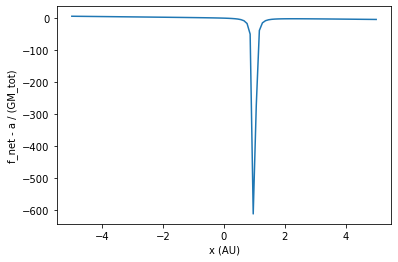

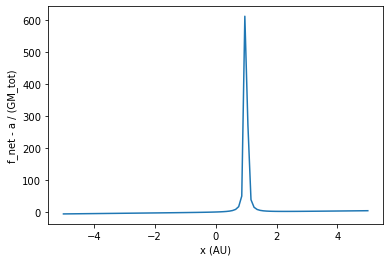

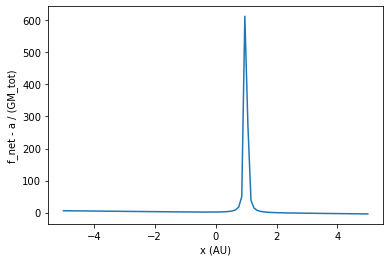

As we can see, our roots graphically work out and we can see a considerable force at those points


In [17]:
# 2. Numerically solve for the coordinates using root-finding methods for one variable. Use
#    a different method, one of which must be the Newton-Raphson (or secant version), for
#    each Lagrange point.

# SEE ANALYTICAL WORK


xmin = 0.001
xmax = 2.0

def L1_eq(u):
    return (r_earth - u) - (r_earth / (1-u)**2) + r_sun / u**2

def L2_eq(u):
    return -1 * L1_eq(u)

def L3_eq(u):
    return -(u-r_earth) + (r_earth / (u-1)**2) + (r_sun / u**2)

print("The following are solutions via root-finding")


print("L1 is ", secant(L1_eq, xmin)[0], "from the earth TOWARDS the sun" ,"(found with the secant method)")
print("L2 is ", bisection(L1_eq, xmin, xmax)[0], "from the earth AWAY from the sun" ,"(found with the bisectional method)")
print("L3 is ", falseposition(L3_eq, xmin, xmax), "from the earth TOWARDS the sun", "(found with falseposition)")

print("Now, checking results with the scipy library: ")
print("L1 is ", sci.optimize.newton(L1_eq, xmin))
print("L2 is ", sci.optimize.newton(L2_eq, xmin))
print("L3 is ", sci.optimize.newton(L3_eq, xmin))

print("Now, visualizing...")

L1x = np.linspace(-5, 5, 100)
pyl.plot(L1x, L1_eq(L1x))
pyl.xlabel("x (AU)")
pyl.ylabel("f_net - a / (GM_tot)")
pyl.show()

L2x = np.linspace(-5, 5, 100)
pyl.plot(L2x, L2_eq(L2x))
pyl.xlabel("x (AU)")
pyl.ylabel("f_net - a / (GM_tot)")
pyl.show()


L3x = np.linspace(-5, 5, 100)
pyl.plot(L3x, L3_eq(L3x))
pyl.xlabel("x (AU)")
pyl.ylabel("f_net - a / (GM_tot)")
pyl.show()

print("As we can see, our roots graphically work out and we can see a considerable force at those points")

## 3.2.2 L4 (and L5)

### Exact or nearly-exact analytical solutions

In [18]:
# Defining helpers and constants

L4_guess = ( 1/2 , 3/4 ) # just an initial guesses from eyeballing our diagram
L5_guess = ( 1/2 , -3/4 )

def fx_sol(x,y):
    return (x/((x + r_sun)**2 + y**2)**(3/2)) - x

def fy_sol(x,y):
    return (1/((x + r_sun)**2 + y**2)**(3/2)) - 1

# just a wrapper for our fy_sol and fx_sol
def f_(x, y):
    return [fx_sol(x,y), fy_sol(x,y)]

def Jacob(x, y, h):
    return [[(f_(x + h, y)[0] - f_(x - h, y)[0])/(2*h), (f_(x, y + h)[0] - f_(x ,y - h)[0])/(2*h)],
           [(f_(x + h, y)[1] - f_(x - h, y)[1])/(2*h), (f_(x, y + h)[1] - f_(x, y - h)[1])/(2*h)]]
    
def newRaph2D(f_, L):
    # Set limits
    accuracy = 1E-9
    Nmax = 1000
    h = 0.1
    
    # Initialize
    x, y = L[0], L[1]
    
    # Normalize matrix
    f = f_(x,y)
    f_normal = np.linalg.norm(f)
    
    # Iterate
    i = 0
    delta = 0
    
    while abs(f_normal) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Guess
        J = Jacob(x,y,h)
        delta = np.linalg.solve(J, f)
        L -= delta
        
        x, y = L[0], L[1]
        f = f_(x,y)
        f_normal = np.linalg.norm(f)

    return L, i, delta

In [19]:
# 1. Find exact or nearly-exact analytical solutions. No Taylor expansions are required.
# SEE ANALYTICAL WORK

def L4_exact(r_s, r_e):
    x = (r_e**2 - r_s**2)/2
    y = np.sqrt((1-r_s)**2 - x**2)
    return x,y

def L5_exact(r_s, r_e):
    x = (r_e**2 - r_s**2)/2
    y = -1 * np.sqrt((1-r_s)**2 - x**2) # bc symmetric
    return x,y


print("L4 is located at ", L4_exact(r_sun, r_earth))
print("L5 is located at ", L5_exact(r_sun, r_earth))

L4 is located at  (0.499996997495189, 0.8660236702857428)
L5 is located at  (0.499996997495189, -0.8660236702857428)


### Numerically solve using Newton's Method for two variables

It makes sense why our point would be inbetween the earth 
L4 is located at  [0.5        0.86602367]
L5 is located at  [0.5, -0.8660236701213924]
Checking our work via scipy...
L4 is located at  [0.5        0.86602367]
L5 is located at  [ 0.5        -0.86602367]
Visualization of our equations


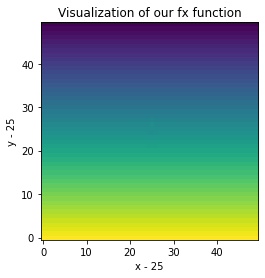

Notice very carefully in the (0,0) of our graph above (mind the offset, really 25, 25) that it is not uniform


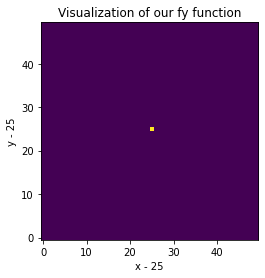

In [20]:
# 2. Numerically solve for the coordinates using Newton’s method for two variables.
# SEE ANALYTICAL WORK

xmin_, xmax_ = 0.5, 0.9 # for whatever reason, old xmin and xmax do not work
res = newRaph2D(f_, [xmin_, xmax_])[0]


print("It makes sense why our point would be inbetween the earth ")
print("L4 is located at ", res)
print("L5 is located at ", [res[0], -1 * res[1]]) # symmetric 


print("Checking our work via scipy...")

def eqs(vars):
    x, y = vars
    eq_1 = fx_sol(x,y)
    eq_2 = fy_sol(x,y)
    return [eq_1, eq_2]

L4_check = fsolve(eqs, L4_guess)
L5_check = fsolve(eqs, L5_guess)

print("L4 is located at ", L4_check)
print("L5 is located at ", L5_check)


print("Visualization of our equations")
board_fx = np.zeros([50, 50], dtype = float)
board_fy = np.zeros([50, 50], dtype = float)
for i in range(50):
    for j in range(50):
        board_fx[i][j] = fx_sol(i - 25, j - 25)
        board_fy[i][j] = fy_sol(i - 25, j - 25)
        
pyl.title("Visualization of our fx function")
pyl.xlabel("x - 25")
pyl.ylabel("y - 25")
pyl.imshow(board_fx, origin = (25, 25))
pyl.show()

print("Notice very carefully in the (0,0) of our graph above (mind the offset, really 25, 25) that it is not uniform")

pyl.title("Visualization of our fy function")
pyl.xlabel("x - 25")
pyl.ylabel("y - 25")
pyl.imshow(board_fy, origin = (25, 25))
pyl.show()
 